### IS Proof of concept - DRMABS

In [15]:
import operator
import numpy as np
import seaborn as sns
import pandas as pd
import scipy

In [16]:
import matplotlib.pyplot as plt
import networkx as nx

#pip install pygsp
from pygsp import graphs

In [17]:
import nltk
from nltk import bigrams
import collections

In [18]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [19]:
# Files definition
comment_past_nlp_file = 'Datasource\comment_nlp_meiji.xlsx'

เปิดไฟล์ที่ได้จากขั้นตอน Data Prep

In [20]:
cooc_matrix = pd.read_excel(comment_past_nlp_file,index_col=0)

In [73]:
cooc_matrix.head()

,โชคชัย,นมเมจิ,นมดัชมิลล์,นมแดรี่โฮม,นมโฟร์โมสต์,รสจืด,รสหวาน,รสกาแฟ,ไขมันต่ำ,รสช็อคโกแลต,...,จืด,หวาน,หอม,อร่อย,ถูก,แพง,ขวดกลาง,ขวดเล็ก,ขวดใหญ่,ฝา
โชคชัย,0,3,3,0,0,3,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
นมเมจิ,3,0,5,0,1,9,4,2,1,3,...,23,15,13,22,0,5,1,3,7,13
นมดัชมิลล์,3,5,0,0,1,6,1,1,0,0,...,3,0,1,1,0,1,0,0,0,1
นมแดรี่โฮม,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
นมโฟร์โมสต์,0,1,1,0,0,0,0,0,0,0,...,1,0,1,2,0,1,0,0,0,0


In [22]:
cooc_matrix.describe().stack().unstack(0)

,count,mean,std,min,25%,50%,75%,max
โชคชัย,30.0,0.366667,0.927857,0.0,0.0,0.0,0.00,3.0
นมเมจิ,30.0,5.233333,6.479056,0.0,1.0,3.0,7.00,23.0
นมดัชมิลล์,30.0,0.833333,1.510500,0.0,0.0,0.0,1.00,6.0
นมแดรี่โฮม,30.0,0.033333,0.182574,0.0,0.0,0.0,0.00,1.0
นมโฟร์โมสต์,30.0,0.233333,0.504007,0.0,0.0,0.0,0.00,2.0
รสจืด,30.0,1.333333,2.202402,0.0,0.0,0.0,2.75,9.0
รสหวาน,30.0,0.933333,1.337350,0.0,0.0,0.0,1.00,4.0
รสกาแฟ,30.0,0.266667,0.583292,0.0,0.0,0.0,0.00,2.0
ไขมันต่ำ,30.0,0.333333,0.606478,0.0,0.0,0.0,0.75,2.0
รสช็อคโกแลต,30.0,0.600000,1.162637,0.0,0.0,0.0,1.00,4.0


สร้างกราฟ

In [80]:
def stackForGraph(cm):
    stack_matrix = pd.DataFrame(cm.stack())
    stack_matrix.index.names = ['item', 'relatedItem']
    stack_matrix.columns = ['coocValue']
    stack_matrix.reset_index(inplace=True)
    stack_matrix = stack_matrix[(stack_matrix.item != stack_matrix.relatedItem)]
    stack_matrix.sort_values(by='coocValue',ascending=False).head(10)
    return stack_matrix

In [44]:
def plot_pandas_graph(df):
    fig, ax=plt.subplots(figsize=(10,10))
    G=nx.from_pandas_edgelist(df,source='item',target='relatedItem')
    nx.draw(G,with_labels=True, font_family='Tahoma',node_color='yellow')
    plt.show()
    return G

In [91]:
def create_upperTriMatrix(df):
    df.values[np.tril(np.ones(df.shape)).astype(np.bool)] = 0
    return df

Upper matrix plot (Co-occurence without normalization)

In [93]:
cooc_matrix_ = create_upperTriMatrix(cooc_matrix)
cooc_matrix_2 = stackForGraph(cooc_matrix_)
cooc_matrix_2_filter = cooc_matrix_2[(cooc_matrix_2.coocValue > 0)]

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


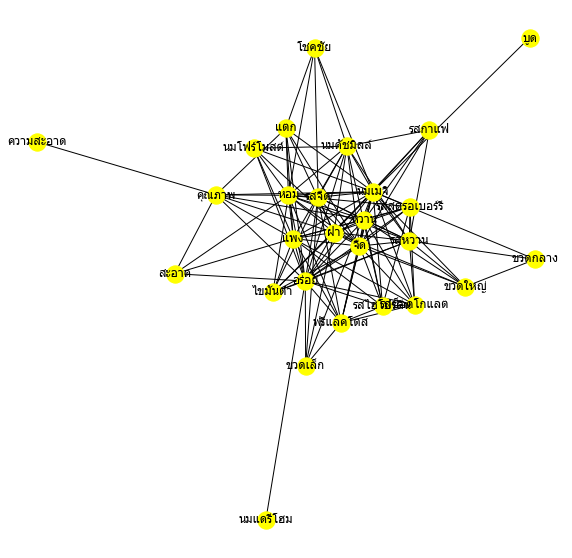

In [94]:
G2 = plot_pandas_graph(cooc_matrix_2_filter)

Co-occurence with normalization

In [81]:
stack_matrix = stackForGraph(cooc_matrix)

In [82]:
stack_pd_matrix_filter = stack_matrix[(stack_matrix.coocValue > 2)]

In [83]:
stack_pd_matrix_filter.shape

(54, 3)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


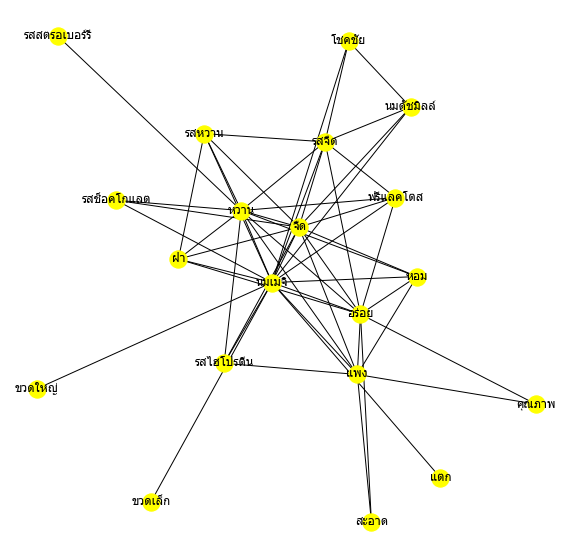

In [84]:
G2 = plot_pandas_graph(stack_pd_matrix_filter)

In [51]:
from community import community_louvain
partition = community_louvain.best_partition(G2)

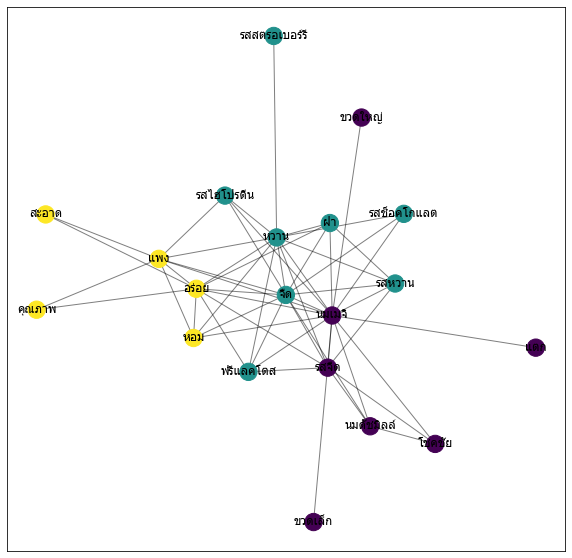

In [52]:
fig, ax=plt.subplots(figsize=(10,10))
G2=nx.from_pandas_edgelist(stack_pd_matrix_filter,source='item',target='relatedItem')
pos = nx.spring_layout(G2)
nx.draw_networkx_nodes(G2,pos,partition.keys(),node_color=list(partition.values()))
nx.draw_networkx_edges(G2, pos, alpha=0.5)
nx.draw_networkx_labels(G2,pos,font_family='Tahoma')
plt.show()